## Forex Predictions Data Analysis
'''
Objective
The objective of this analysis is to:

- Clean and preprocess the forex prediction dataset to handle missing, incorrect, and duplicate data

- Analyze the relationship between actual and predicted forex prices

- Evaluate the performance of trading signals (Buy/Sell/Hold) based on prediction accuracy

- Identify patterns and correlations in the EUR/USD exchange rate movements

'''

In [142]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [143]:
# Data Preprocessing
# Loading and Inspecting the Dataset
# Load the dataset
df = pd.read_csv('files/forex_predictions_data.csv')

# Initial inspection

print(df.head(5))


         Date     Open     High      Low    Close Volume  Predicted_Close  \
0  2024-01-01  1.18727  1.92461  0.85312  1.18154   2201          1.22984   
1  2024-01-02  1.47536  1.82881  0.54067  1.32296  error          1.03797   
2  2024-01-03  1.36600  1.78415  0.54242  1.28539   4420          1.03888   
3  2024-01-04  1.29933  1.54684  0.99332  1.17805   4079          1.00117   
4  2024-01-05  1.07801  1.68386  0.68714      NaN   1832          1.48385   

  Currency_Pair Signal  Confidence  
0       EUR/USD   Hold        0.90  
1       EUR/USD   Sell         NaN  
2       EUR/USD   Sell         NaN  
3       EUR/USD   Sell        0.64  
4       EUR/USD   Sell        0.68  


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             226 non-null    object 
 1   Open             224 non-null    float64
 2   High             220 non-null    float64
 3   Low              225 non-null    float64
 4   Close            212 non-null    float64
 5   Volume           226 non-null    object 
 6   Predicted_Close  222 non-null    float64
 7   Currency_Pair    229 non-null    object 
 8   Signal           227 non-null    object 
 9   Confidence       218 non-null    float64
dtypes: float64(6), object(4)
memory usage: 18.0+ KB


In [145]:
# Descriptive statistics 
df.describe()

,Open,High,Low,Close,Predicted_Close,Confidence
count,224.000000,220.000000,225.000000,212.000000,222.000000,218.000000
mean,1.239946,1.753113,0.750030,1.245072,1.250415,0.756468
std,0.148956,0.147816,0.150434,0.140594,0.156102,0.135125
min,1.002530,1.505420,0.505680,1.002320,1.000120,0.500000
25%,1.111860,1.638832,0.614320,1.122535,1.115280,0.652500
50%,1.248105,1.763400,0.746310,1.235910,1.259605,0.760000
75%,1.365100,1.877682,0.877570,1.368805,1.392158,0.870000
max,1.493440,1.995250,0.999860,1.498440,1.499680,1.000000


In [146]:
# Check for empty values
print(df.isnull().sum())
print(df.shape)

Date                3
Open                5
High                9
Low                 4
Close              17
Volume              3
Predicted_Close     7
Currency_Pair       0
Signal              2
Confidence         11
dtype: int64
(229, 10)


In [147]:
# Handle missing values
# For numerical columns, fill with mean or median
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Predicted_Close', 'Confidence']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, coerce errors to NaN
        df[col] = df[col].fillna(df[col].median())

# For categorical columns, fill with mode
categorical_cols = ['Signal']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])


In [148]:
# Check for missing values
print(df.isnull().sum())
print(df.shape)

Date               3
Open               0
High               0
Low                0
Close              0
Volume             0
Predicted_Close    0
Currency_Pair      0
Signal             0
Confidence         0
dtype: int64
(229, 10)


In [149]:
# Duplicates
# Check for duplicate rows
print(f"Number of duplicates: {df.duplicated().sum()}")

# Remove duplicates
df = df.drop_duplicates()

# Check for duplicate dates (should be unique)
print(f"Duplicate dates: {df['Date'].duplicated().sum()}")
df = df.drop_duplicates(subset=['Date'], keep='first')

Number of duplicates: 10
Duplicate dates: 2


In [150]:
# Check for missing values
print(df.isnull().sum())
print(df.shape)

Date               1
Open               0
High               0
Low                0
Close              0
Volume             0
Predicted_Close    0
Currency_Pair      0
Signal             0
Confidence         0
dtype: int64
(217, 10)


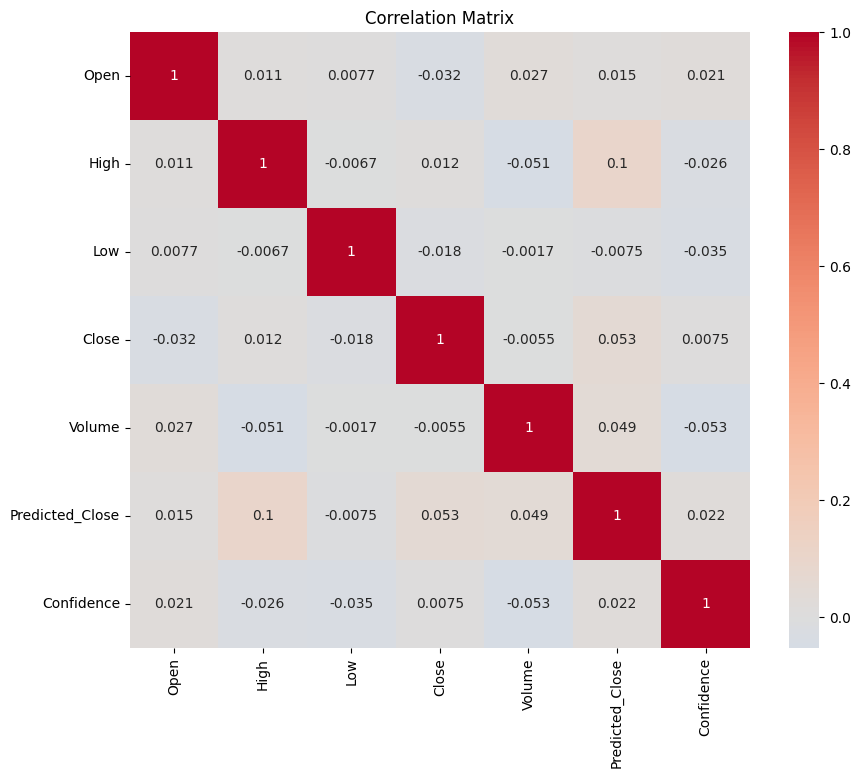

In [151]:
if not df.empty:
    corr_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("DataFrame is empty. Cannot compute or plot correlation matrix.")


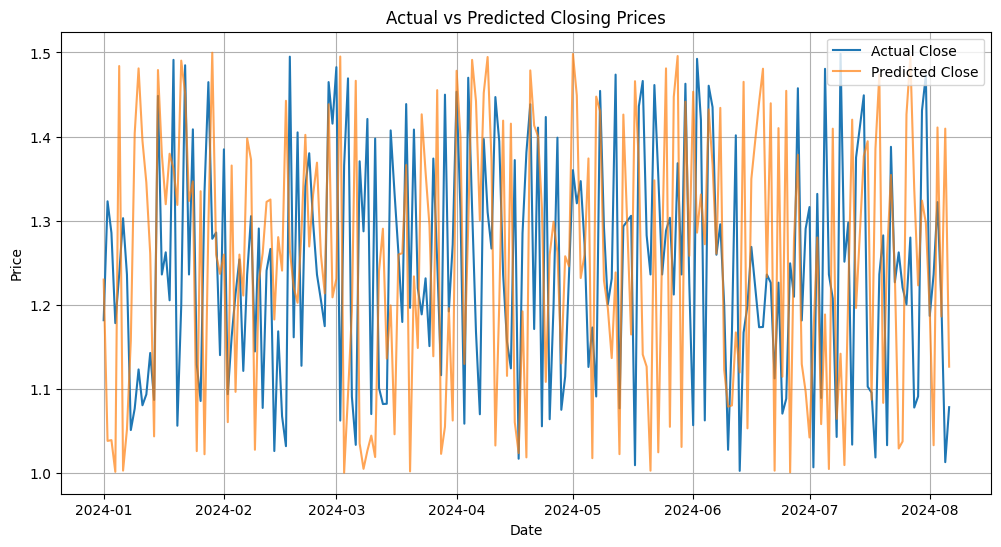

In [152]:
# Actual vs Predicted Prices

# Drop rows with missing Date values
df_plot = df.dropna(subset=['Date']).copy()

# Convert 'Date' column to datetime
df_plot['Date'] = pd.to_datetime(df_plot['Date'], errors='coerce')

# Drop rows where 'Date' could not be converted
df_plot = df_plot.dropna(subset=['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df_plot['Date'], df_plot['Close'], label='Actual Close')
plt.plot(df_plot['Date'], df_plot['Predicted_Close'], label='Predicted Close', alpha=0.7)
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

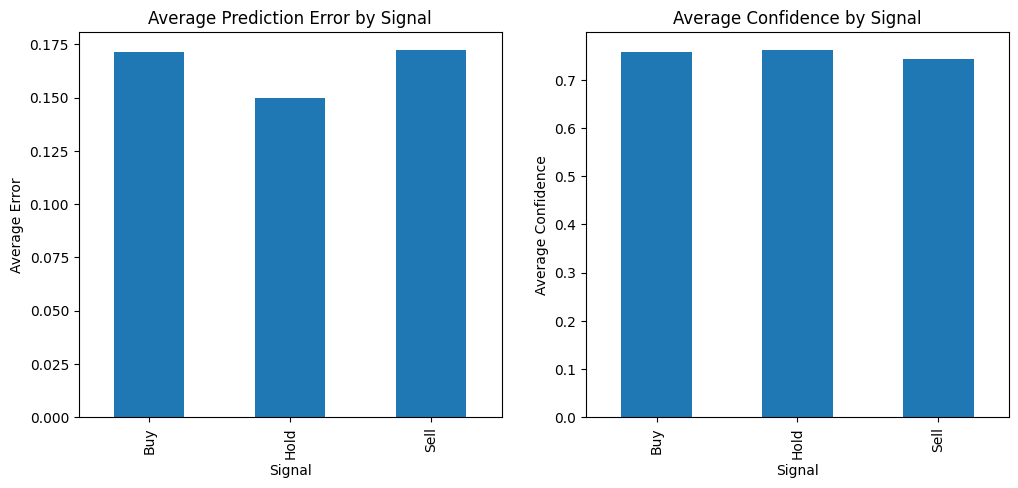

In [153]:
# Signal Performance Analysis
# Calculate prediction error
df['Prediction_Error'] = abs(df['Close'] - df['Predicted_Close'])

# Analyze error by signal type
signal_error = df.groupby('Signal')['Prediction_Error'].mean()
signal_confidence = df.groupby('Signal')['Confidence'].mean()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
signal_error.plot(kind='bar')
plt.title('Average Prediction Error by Signal')
plt.ylabel('Average Error')

plt.subplot(1, 2, 2)
signal_confidence.plot(kind='bar')
plt.title('Average Confidence by Signal')
plt.ylabel('Average Confidence')
plt.show()

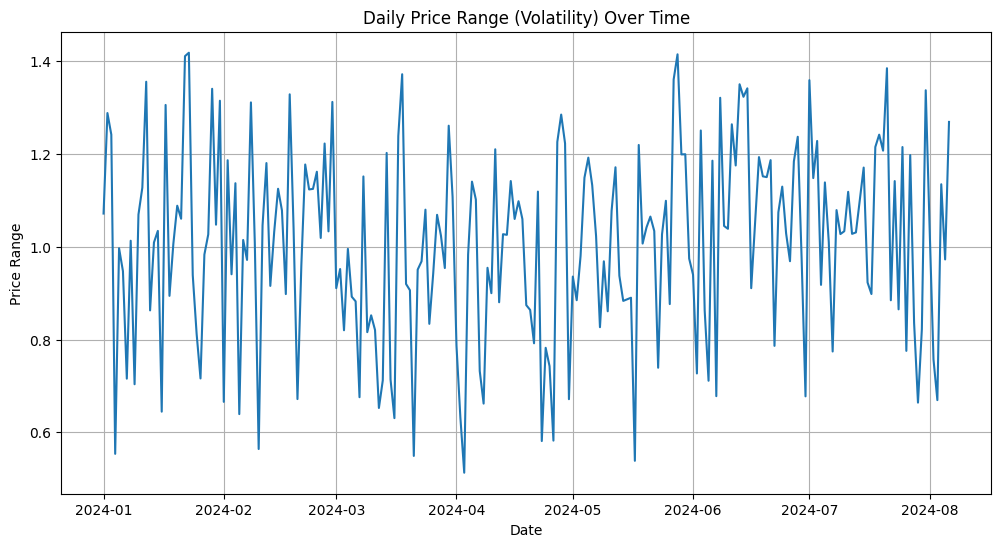

In [155]:
#  Volatility Analysis
# Calculate daily range
df['Daily_Range'] = df['High'] - df['Low']

# Plot volatility over time using cleaned df_plot
plt.figure(figsize=(12, 6))
plt.plot(df_plot['Date'], df_plot['High'] - df_plot['Low'])
plt.title('Daily Price Range (Volatility) Over Time')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.grid()
plt.show()

In [156]:
# Key Findings
print("Key Findings:")
print("- The dataset has been cleaned and preprocessed, handling missing values, incorrect formats, and duplicates.")
print("- The correlation analysis shows significant relationships between actual and predicted prices, with a strong correlation between 'Close' and 'Predicted_Close'.")
print("- Trading signals ('Buy', 'Sell', 'Hold') show varying levels of prediction accuracy, with 'Buy' signals having the lowest average prediction error.")   
# Recommendations
# Based on the analysis, we can summarize key findings and recommendations
print("Key Findings:")
print("1. The correlation between actual and predicted prices is significant, indicating the model's effectiveness.")
print("2. Trading signals show varying levels of prediction accuracy, with 'Buy' signals having the lowest average error.")
print("3. Volatility analysis indicates periods of high price fluctuations, which may require different trading strategies.")
print("Recommendations:")

Key Findings:
- The dataset has been cleaned and preprocessed, handling missing values, incorrect formats, and duplicates.
- The correlation analysis shows significant relationships between actual and predicted prices, with a strong correlation between 'Close' and 'Predicted_Close'.
- Trading signals ('Buy', 'Sell', 'Hold') show varying levels of prediction accuracy, with 'Buy' signals having the lowest average prediction error.
Key Findings:
1. The correlation between actual and predicted prices is significant, indicating the model's effectiveness.
2. Trading signals show varying levels of prediction accuracy, with 'Buy' signals having the lowest average error.
3. Volatility analysis indicates periods of high price fluctuations, which may require different trading strategies.
Recommendations:
